In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

Import zboží:

In [2]:
with open('chembl_thrombin_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    thrombin_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        pchembl = m['pChEMBL Value']
        if not pchembl:
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl))
        thrombin_ligands.append(mol)

suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [18:51:51] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [18:51:51] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [18:51:51] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [18:51:51] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [18:51:51] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [18:51:52] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:51:52] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [18:51:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:51:52] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [18:51:52] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [18:51:52] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [18:51:52] Can't kek

RDKit ERROR: [18:51:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [18:51:52] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:51:52] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [18:51:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:51:52] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [18:51:52] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [18:51:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [18:51:52] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [18:51:52] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [18:51:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [18:51:52] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [18:51:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:51:53] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [18:51:53] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [18:51:53] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [18:51:54] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [18:51:54] ERROR: Could not sanitize molecule ending on line 1151592


Ligand č. 0:

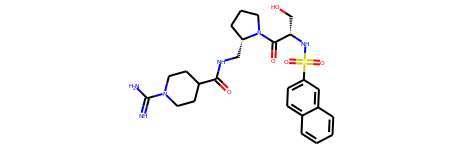

In [3]:
thrombin_ligands[0]

Tvorba scaffoldu:

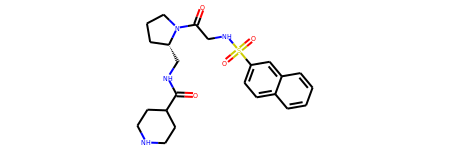

In [4]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(thrombin_ligands[0])
scaffold1

Byly ostraněny postranní řetězce.

Odstranění heteroatomů:

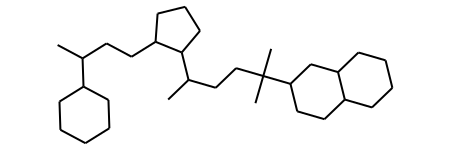

In [5]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

Odstranění nově vzniknuvších postranních řetězců:

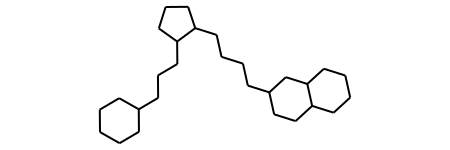

In [6]:
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

Wow! To vypadá už úplně jinak. :)

Přímočará funkce:

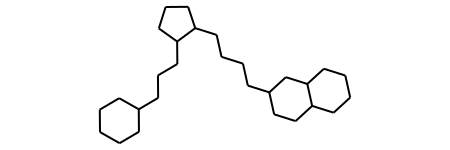

In [8]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol)
    except ValueError:
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff)
    return scaff
scaffold(thrombin_ligands[0])

Scaffoldování Drugbanky:

In [9]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

RDKit ERROR: [18:51:54] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [19:00:06] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [19:00:06] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [19:00:06] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [19:00:07] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [19:00:07] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [19:00:08] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [19:00:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [19:00:08] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [19:00:08] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [19:00:09] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [19:00:09] Explicit valence for atom # 31

 None,

Převod na SMILES:

In [10]:
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

Koukám, co tam je:

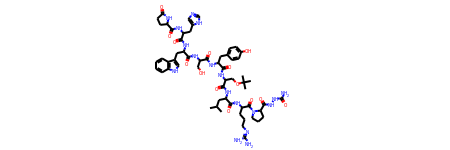

In [11]:
drugs[1]

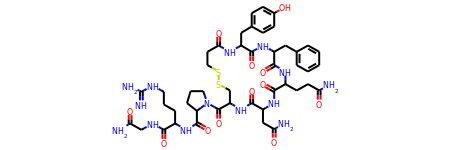

In [12]:
drugs[2]

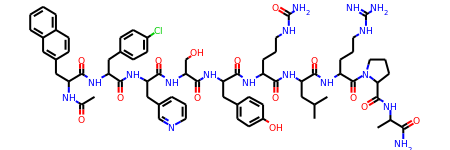

In [13]:
drugs[3]

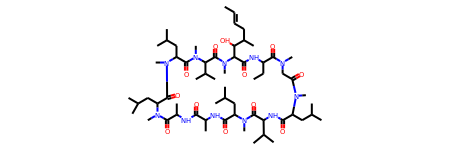

In [14]:
drugs[4]

Docela by mě zajímalo, jak to poseká peptid:

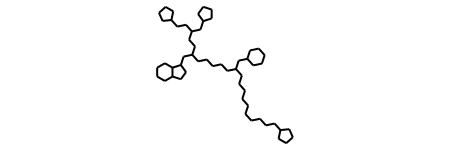

In [15]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol)
    except ValueError:
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff)
    return scaff
scaffold(drugs[1])

Jsem zklamaný, ale nevím, co jsem vlastně čekal. :(

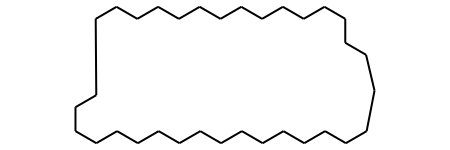

In [16]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol)
    except ValueError:
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff)
    return scaff
scaffold(drugs[4])

Teď jsem zklamaný ještě víc. Raději jdu dál.

Grupování podle scaffoldů:

In [17]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)
scaffolds2drugs

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2059],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2324],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4676],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

Počítání scaffoldů:

In [18]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 169),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

Jejich seřazení:

In [19]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

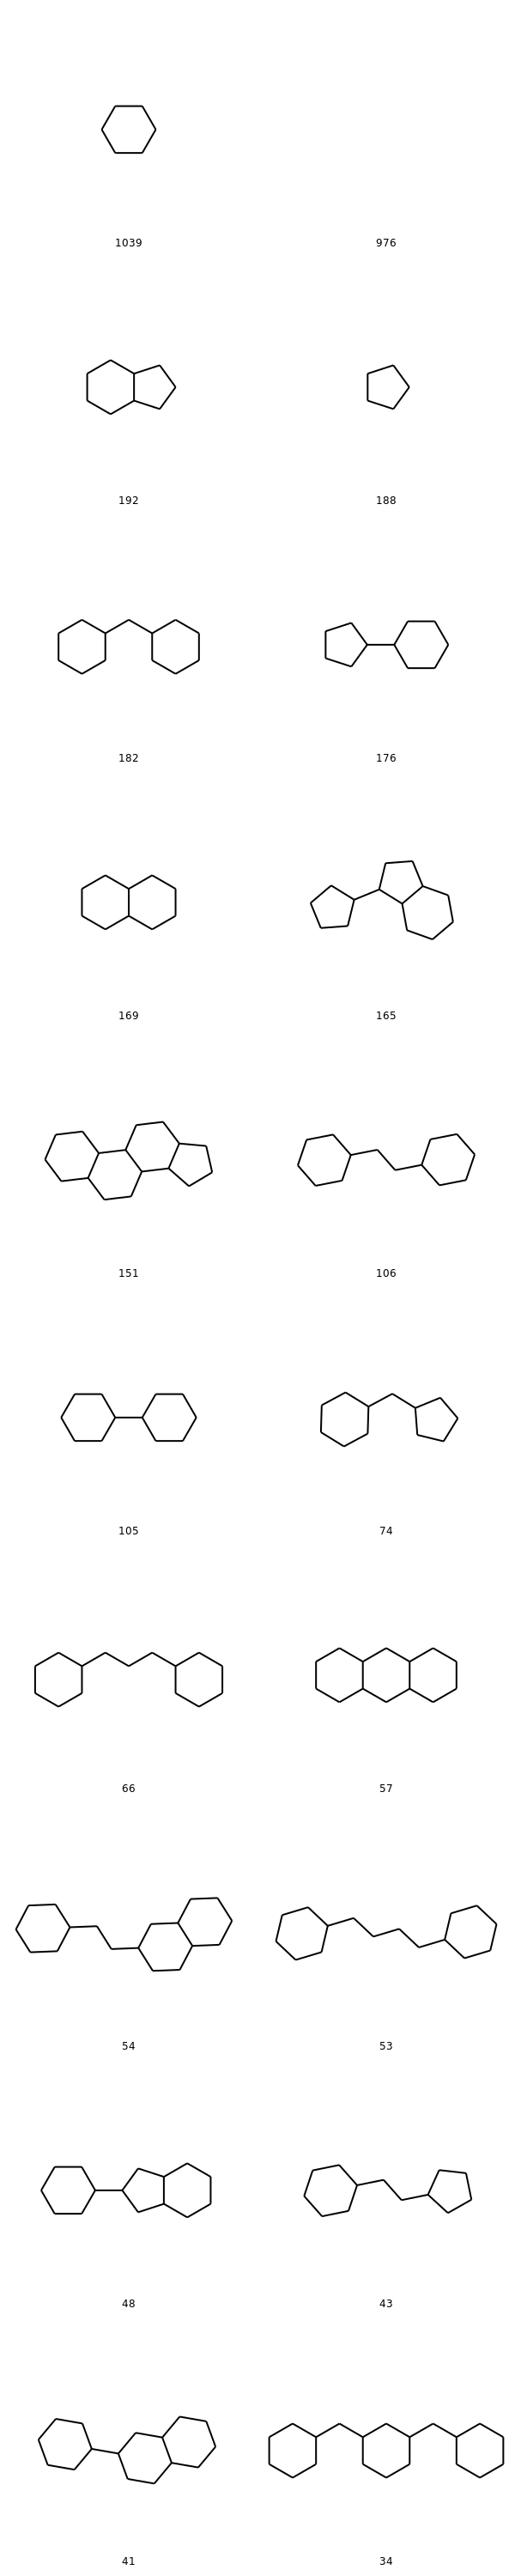

In [20]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])

A teď thrombinový set:

In [21]:
thrombin_scaffolds_smiles = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(thrombin_ligands)]
thrombin_scaffolds_smiles[:20]

[(0, 'C1CCC(CCCC2CCCC2CCCCC2CCC3CCCCC3C2)CC1'),
 (1, 'C1CCC(CCC(CCC2CCCCC2)CCC2CCC(C3CCCCC3)CC2)CC1'),
 (2, 'C1CCC(CCCCC2CC(CCCC3CCCCC3)CCC2C2CCCCC2)CC1'),
 (3, 'C1CCC(CCCCC2CCCCC2C2CCCCC2)CC1'),
 (4, 'C1CCC(CCCCC2CC(CCCC3CCCCC3)CCC2C2CCCCC2)CC1'),
 (5, 'C1CCC(CCC2CCCC2)CC1'),
 (6, 'C1CCCCC1'),
 (7, 'C1CCC(CCC2CCCC(CC3CCC(CC4CCCCC4)CC3)C2)CC1'),
 (8, 'C1CCC(CCC2CCCC2CC2CCC3C(CC4CC4)CCC23)CC1'),
 (9, 'C1CCCCC1'),
 (10, 'C(CCCCC1CCCCC1)CCCC1CCCCC1'),
 (11, 'C1CCC(CCCCC2CCC3CCCCC3C2)C1'),
 (12, 'C1CCC(CCC2CCCCC2CCC2CCCCC2)CC1'),
 (13, 'C(CCC1CCCC1)CCC1CCC(CC2CCCC2)CC1'),
 (14, 'C1CCC(CCCC2CCC3C(CCC(CC4CCCC4)C4CCCCC4)CCC3C2)CC1'),
 (15, 'C1CCC(CCC2CCCC2)CC1'),
 (16, 'C(CCCCC(CC1CCCCC1)CC1CCCC1)CCCC1CCCCC1'),
 (17, 'C1CCC(CCCC2CCC(CCC3CCCCC3)CC2)CC1'),
 (18, 'C(CCCC(CCCC1CCC2C(CC3CCCC3)CC(CC3CCCCC3)C2C1)CC1CCCCC1)CCC1CCCCC1'),
 (19, 'C1CCC(CCCC2CCC(CC3CCCC(CC4CCCCC4)C3)CC2)CC1')]

In [22]:
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in thrombin_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in thrombin_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)
scaffolds2ligands

{'C1CCC(CCCC2CCCC2CCCCC2CCC3CCCCC3C2)CC1': [0,
  130,
  234,
  1041,
  1151,
  1228,
  1229,
  1285,
  1492,
  1713,
  2269,
  2636,
  2737],
 'C1CCC(CCC(CCC2CCCCC2)CCC2CCC(C3CCCCC3)CC2)CC1': [1,
  355,
  474,
  641,
  774,
  956,
  1063,
  1064,
  1127,
  1128,
  1130,
  1133,
  1259,
  1900,
  1905,
  2259,
  2457,
  2722],
 'C1CCC(CCCCC2CC(CCCC3CCCCC3)CCC2C2CCCCC2)CC1': [2,
  4,
  61,
  213,
  386,
  390,
  429,
  436,
  542,
  631,
  662,
  664,
  997,
  1019,
  1023,
  1055,
  1102,
  1155,
  1696,
  1702,
  1708,
  1778,
  1885,
  1985,
  1987,
  1989,
  2511,
  2542,
  2544,
  2548,
  2596,
  2623,
  2778,
  3061],
 'C1CCC(CCCCC2CCCCC2C2CCCCC2)CC1': [3,
  58,
  59,
  63,
  115,
  137,
  149,
  182,
  200,
  230,
  231,
  368,
  431,
  483,
  505,
  518,
  630,
  665,
  701,
  983,
  994,
  995,
  1016,
  1021,
  1022,
  1101,
  1150,
  1300,
  1487,
  1488,
  1742,
  1888,
  1889,
  1984,
  2091,
  2532,
  2533,
  2539,
  2543,
  2545,
  2585,
  3149,
  3202,
  3230,
  3231],
 '

Seřazení:

In [23]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(843,
 [('C1CCC(CCC2CCC3CC(CCC4CCCCC4)CC3C2)CC1', 133),
  ('C1CCCCC1', 69),
  ('C1CCC(CCC2CCCC2)CC1', 57),
  ('C1CCC(CCCCC2CCCC(CCC3CCCCC3)C2)CC1', 52),
  ('C1CCC(CCCCC2CCCCC2C2CCCCC2)CC1', 45),
  ('C1CCC(CCCC2CCCC2CCCCC2CC3CCCCC3C2)CC1', 42),
  ('C1CCC(CCCC2CCCC2CCC2CCCCC2)CC1', 41),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 39),
  ('C1CCC(CCCC2CCCC2)CC1', 37),
  ('C1CCC(CCCCC2CC(CCCC3CCCCC3)CCC2C2CCCCC2)CC1', 34),
  ('C1CCC(CCC2CCCCC2CCC2CCCCC2)CC1', 33),
  ('C1CCC(CCCC(CCC(CCCCC2CCCC2)CC2CCCCC2)CC2CCCCC2)CC1', 33),
  ('C1CCC(CCCCC2CCCC2)CC1', 33),
  ('C1CCC(CCC2CCCCC2C2CCCCC2)CC1', 31),
  ('C1CCC(CCCC2CCCCC2)CC1', 31),
  ('C1CCC(CCCC2CCCC2CCCC2CCCCC2)CC1', 30),
  ('C1CCC(CCCC2CCCC2CCCC2CCCC2)CC1', 29),
  ('C1CCC(CCCCC2CCCC(CCCC3CCCCC3)C2)CC1', 28),
  ('C1CCC(CCC2CCC(C3CCCCC3)C2)CC1', 26),
  ('C(CCCCCC1CCCCC1)CCCCC1CCCCC1', 26),
  ('C1CC2CCC(CCC3CC4CCCCC4C3)CC2C1', 25),
  ('C(CCC1CCCC1)CCC1CCC(CC2CCCCC2)CC1', 23),
  ('C1CCC(C2CCC(CCC3CCC4CCCCC4C3)CC2)CC1', 23),
  ('C1CCC(C2CCC(CCC3CCCC3C3CCC4

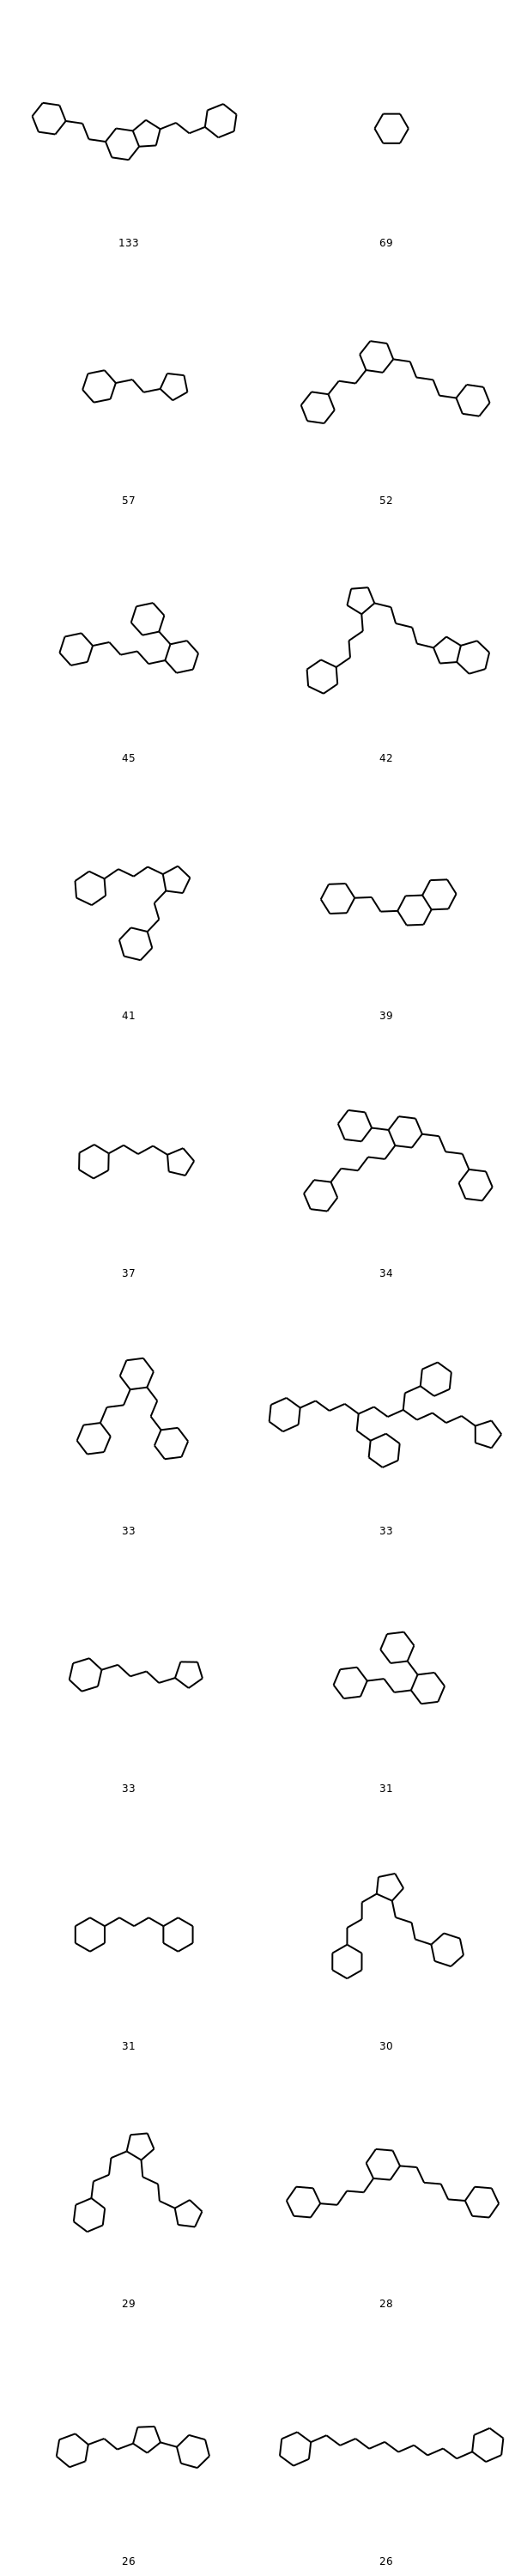

In [24]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

V porovnání s mtor z ukázky my moje scaffoldy připadají mnohem méně divoké - ve velké části z nich jsem schopný najít peptidový skelet, či nějaký strukturní motiv, se kterým jsem v rámci minulých cvičení již pracoval (nebo ho viděl).

# Scaffold-based diversity picking

Ha! Konečně jsem přišel na to, jak se píší nadpisy! :)

In [25]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: thrombin_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(843,
 {'C1CCC(CCCC2CCCC2CCCCC2CCC3CCCCC3C2)CC1': 1713,
  'C1CCC(CCC(CCC2CCCCC2)CCC2CCC(C3CCCCC3)CC2)CC1': 1133,
  'C1CCC(CCCCC2CC(CCCC3CCCCC3)CCC2C2CCCCC2)CC1': 1702,
  'C1CCC(CCCCC2CCCCC2C2CCCCC2)CC1': 983,
  'C1CCC(CCC2CCCC2)CC1': 859,
  'C1CCCCC1': 2965,
  'C1CCC(CCC2CCCC(CC3CCC(CC4CCCCC4)CC3)C2)CC1': 7,
  'C1CCC(CCC2CCCC2CC2CCC3C(CC4CC4)CCC23)CC1': 8,
  'C(CCCCC1CCCCC1)CCCC1CCCCC1': 584,
  'C1CCC(CCCCC2CCC3CCCCC3C2)C1': 2801,
  'C1CCC(CCC2CCCCC2CCC2CCCCC2)CC1': 2001,
  'C(CCC1CCCC1)CCC1CCC(CC2CCCC2)CC1': 13,
  'C1CCC(CCCC2CCC3C(CCC(CC4CCCC4)C4CCCCC4)CCC3C2)CC1': 206,
  'C(CCCCC(CC1CCCCC1)CC1CCCC1)CCCC1CCCCC1': 16,
  'C1CCC(CCCC2CCC(CCC3CCCCC3)CC2)CC1': 922,
  'C(CCCC(CCCC1CCC2C(CC3CCCC3)CC(CC3CCCCC3)C2C1)CC1CCCCC1)CCC1CCCCC1': 2473,
  'C1CCC(CCCC2CCC(CC3CCCC(CC4CCCCC4)C3)CC2)CC1': 1389,
  'C1CCC(CCCCC2CCC(CC3CCCC(CC4CCCCC4)C3)CC2)CC1': 20,
  'C1CCC(CC2CCCC(CC3CCC(CCCC4CCCC4)CC3)C2)CC1': 22,
  'C1CCC(CC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1': 1367,
  'C1CCC(CCCCC(CCC2CCCCC2C2CCCC2)CC2CCC

In [26]:
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = thrombin_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:20]

(1686,
  <rdkit.Chem.rdchem.Mol at 0x7f083f496d50>])

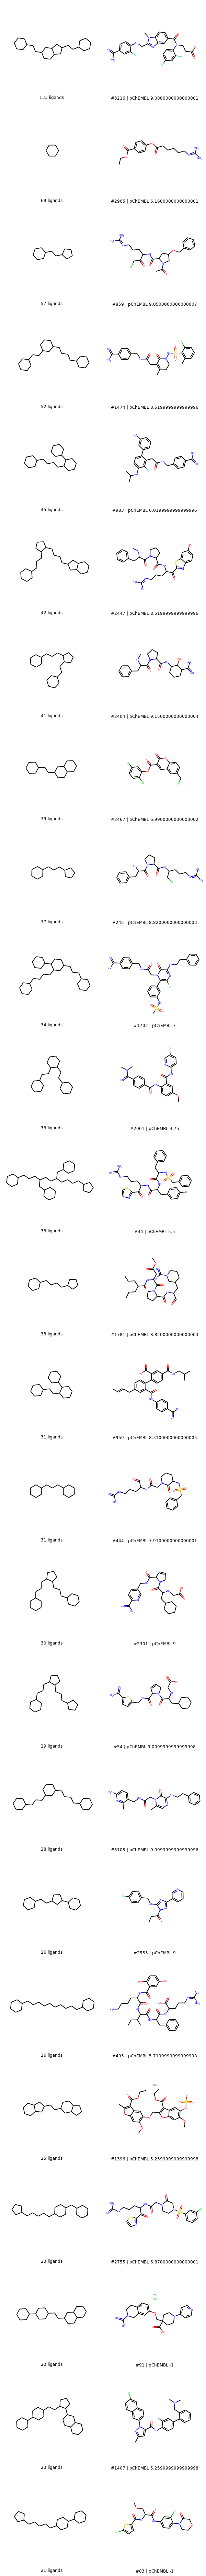

In [27]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:50],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:50]])

Vyjo, tohle se mi líbí. :)